# KFold Cross Validation - cross_val_score
Helps us compare the accuracy of different models on a dataset at the same time

cross_val_score: Compresses KFold cross validation algorithms into a simple function to return accuracy scores of different models. It is best used to figure out what model is the most accurate in the least amount of code possible

Alternative to train_test_split, so no need to use it with KFold







In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import tree

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv("datasets/iris.csv", names = names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
def score(model):
  x = iris.drop("class", axis = "columns")                                      # dataset features
  y = iris["class"]                                                             # dataset target

  kf_score = model_selection.cross_val_score(model, x, y)                       # calculates the accuracy score 3 times and returns them in an array
  return np.average(kf_score)                                                   # numpy takes average of 3 and returns a mean accuracy score


In [ ]:
log_reg = score(linear_model.LogisticRegression())                              # Apply the function in previous cell to each model we are testing

svm_reg = score(svm.SVC(C = 10))

rand_forest = score(ensemble.RandomForestClassifier())

tree = score(tree.DecisionTreeClassifier())

In [ ]:
print("Logistic regression:", log_reg)
print("SVC:", svm_reg)
print("RandomForest:", rand_forest)
print("Decision tree:", tree)

# SVC has the highest mean accuracy score. Thus it is the best model for this dataset. 

Logistic regression: 0.9468954248366014
SVC: 0.9803921568627452
RandomForest: 0.9599673202614379
Decision tree: 0.9673202614379085


# K Means Clustering Unsupervised learning
Unsupervised learning takes only inputs, whereas supervised learning take both input and output. 

K Means Clustering simply groups datapoints into clusters by minimizing the distance between the datapoints and the centroid points which is the most central point of the cluster. 

It is a great algorithm to split data into several clusters represeting features. 

Always use matplotlib visualization when dealing with KMeans Clustering

Watch this [video](https://www.youtube.com/watch?v=jJ_-P6UXefk) for a refresher on how it works. 

Text(0, 0.5, 'Petal width')

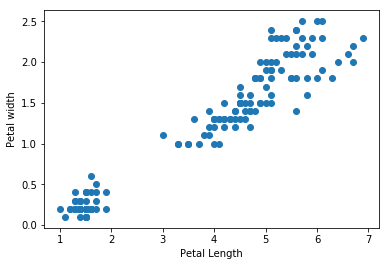

In [ ]:
features = iris[["petal-length", "petal-width"]]                         # We will focus on these 2 features in dataset

plt.scatter(iris["petal-length"], iris["petal-width"])
plt.xlabel("Petal Length")
plt.ylabel("Petal width")

### As one can see, there are 2 distinct clusters. But since there are 3 targets in the dataset, we need to split the graph into 3 distinct clusters.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
cluster = kmeans.fit(features)                               # fit only takes one argument and that is the features. Remember, this is unsupervised learning

features["cluster"] = cluster.predict(features)              

features.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,petal-length,petal-width,cluster
52,4.9,1.5,0
11,1.6,0.2,2
125,6.0,1.8,1
96,4.2,1.3,0
29,1.6,0.2,2


In [ ]:
cluster0 = features[features["cluster"] == 0]                  # we separate the distinct clusters for graphing
cluster1 = features[features["cluster"] == 1]
cluster2 = features[features["cluster"] == 2]

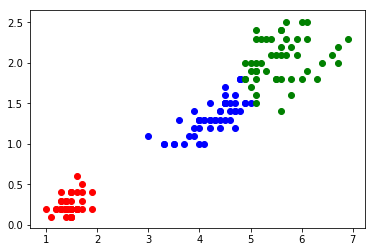

In [ ]:
plt.scatter(cluster0["petal-length"], cluster0["petal-width"], color = "red")                       
plt.scatter(cluster1["petal-length"], cluster1["petal-width"], color = "blue")
plt.scatter(cluster2["petal-length"], cluster2["petal-width"], color = "green")

plt.show()

### The algorithm did a great job in separating the data into 3 clusters representing the 3 different flower types 

However sometimes the clusters are not as neat as the ones above. In that case, we can min-max-scale. It simply reduces a column to values between 0-1, with max == 1 and min == 0. Machine learning algorithms such as KMeans or others which utilizize clustering, using min-max-scale provides better results. 

See this [github](https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb) to see how to use it.

# Elbow technique
When dealing with complex datasets than this one where we dont know how much clusters should be used even after visualizing the data, the elbow technique is the answer. 

We use some math and visualization to determine the ideal number of clusters to use for most datasets. 

Think of the graph as a bent arm and pinpoint the "elbow", the x-value at that point is the ideal number of clusters to use.

In [ ]:
sum_sq_error = []
elbow_range = range(1,10)                           # Try range up to 10 first and do trial and error from there to find the best looking "elbow"
for i in elbow_range:
  elbow = KMeans(n_clusters = i)             
  cluster = elbow.fit(features)                     
  sum_sq_error.append(elbow.inertia_)               # inertia_ calculates the sum of squared error ==
                                                    # == average distance between all points in a cluster and the cluster's centroid (most central point)

Text(0, 0.5, 'sum of squared error')

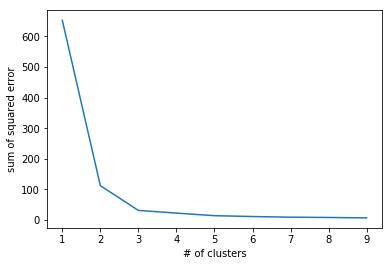

In [ ]:
plt.plot(elbow_range, sum_sq_error)
plt.xlabel("# of clusters")                   # if # of clusters == total points on graph, then sum of squared error == 0 because all points are also centroid points of their clusters
plt.ylabel("sum of squared error")            


### As you can see, x = 3 has the best elbow shape. Thus, the ideal number of clusters to use in this dataset is 3, which we originally used and got the best result with